In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from word2number import w2n

In [2]:
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Desktop\Data_science\Netflix_EDA\netflix_titles_2021.csv")

### Data profiling

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info() # to shows indexes,data types each column name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.describe(include='all') # for shows statistical information

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [9]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### Data cleaning

In [10]:
df.isnull()      

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
miss=df.isnull().sum()
miss

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
miss1 = (df.isnull().sum()/len(df))* 100
miss1

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [13]:
m = pd.concat([miss,miss1],axis=1,keys=['Total','Missing%'])
m

,Total,Missing%
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


<Axes: >

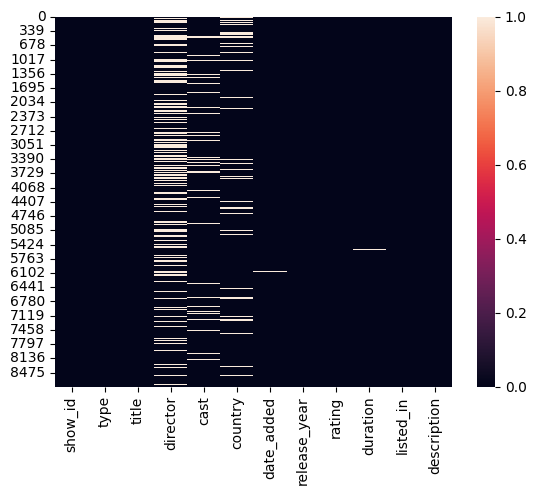

In [14]:
sns.heatmap(df.isnull())   #we can see that director , cast ,country columns contains maximum null values. We will see how to deal with them.

In [15]:
netflix_copy = df.copy()
netflix_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
netflix_copy =netflix_copy.dropna(how='any',subset=['director','cast'])
netflix_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [17]:
netflix_copy.fillna({'country':'missing','rating':'missing','duration':'missing'},inplace=True) 
netflix_copy.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Exploratory data analysis

In [18]:
netflix_copy[netflix_copy.duplicated()] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [19]:
netflix_copy.duplicated().sum() 

0

<Axes: xlabel='count', ylabel='type'>

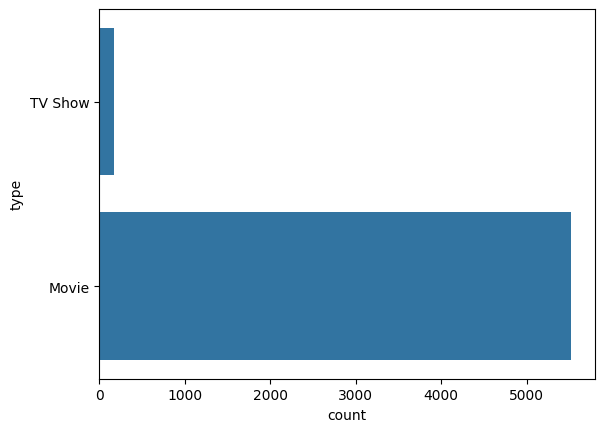

In [20]:
#1 What different types of show or movie are uploaded on Netflix?
sns.countplot(netflix_copy['type'])

In [21]:
netflix_copy.type.value_counts()

type
Movie      5522
TV Show     178
Name: count, dtype: int64

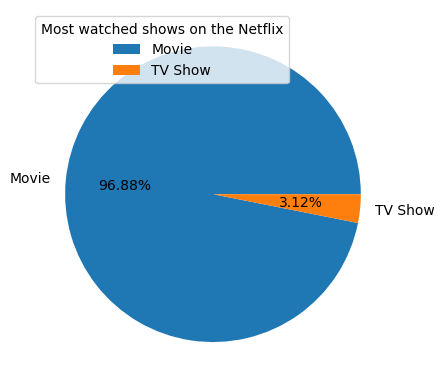

In [22]:
#2 Most watched shows on the Netflix?
type_show = ['Movie','TV Show']
Value_count = [5522,178]
plt.pie(Value_count,labels=type_show,autopct="%2.2f%%")
plt.legend(title='Most watched shows on the Netflix',loc=2)

In [ ]:
#3 Converting object into datetime formate of "date_added"
netflix_copy["date_added"]=pd.to_datetime(netflix_copy['date_added'])
netflix_copy['year_added'] = netflix_copy["date_added"].dt.year
netflix_copy['month_added'] = netflix_copy["date_added"].dt.month
netflix_copy.head()

In [24]:
#4  Distribution of Ratings?
netflix_copy['rating'].nunique()

18

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'TV-14'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'R'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'TV-Y7'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR'),
  Text(17, 0, 'missing')])

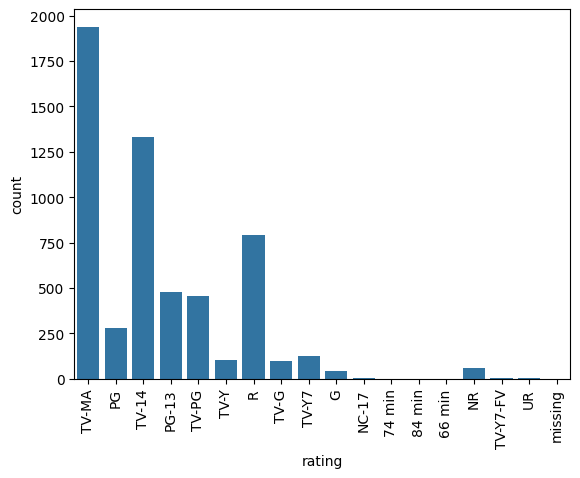

In [25]:
sns.countplot(x=netflix_copy['rating'],orient='v')
plt.xticks(rotation=90)

In [26]:
#5 Which has the highest rating Tv show or Movies?
netflix_copy.groupby("type")["rating"].agg(pd.Series.mode)

type
Movie      TV-MA
TV Show    TV-MA
Name: rating, dtype: object

In [27]:
new_genre = netflix_copy['listed_in'].str.split(",")
new_genre

2       [Crime TV Shows,  International TV Shows,  TV ...
5                  [TV Dramas,  TV Horror,  TV Mysteries]
6                              [Children & Family Movies]
7       [Dramas,  Independent Movies,  International M...
8                         [British TV Shows,  Reality TV]
                              ...                        
8801          [Dramas,  International Movies,  Thrillers]
8802                   [Cult Movies,  Dramas,  Thrillers]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 5700, dtype: object

In [28]:
netflix_copy['Genre 1'] = new_genre.str.get(0)
netflix_copy['Genre 2'] = new_genre.str.get(1)
netflix_copy['Genre 3'] = new_genre.str.get(2)
netflix_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,TV Dramas,TV Horror,TV Mysteries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,British TV Shows,Reality TV,NaN


In [29]:
netflix_copy.groupby(['Genre 1'])['release_year'].count().sort_values(ascending = False)

Genre 1
Dramas                          1586
Comedies                        1184
Action & Adventure               848
Children & Family Movies         548
Documentaries                    397
Stand-Up Comedy                  309
Horror Movies                    274
International Movies             122
Classic Movies                    73
Thrillers                         65
International TV Shows            59
Crime TV Shows                    37
Movies                            30
British TV Shows                  21
Independent Movies                20
Anime Features                    19
Music & Musicals                  18
Sci-Fi & Fantasy                  13
Cult Movies                       12
Kids' TV                          11
Anime Series                      11
Docuseries                        10
TV Shows                           9
Stand-Up Comedy & Talk Shows       8
Romantic Movies                    3
TV Comedies                        3
Classic & Cult TV             

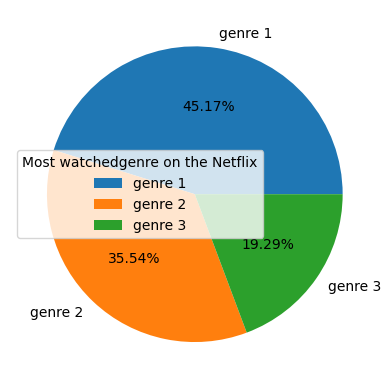

In [30]:
# by using Pie chart
genre_types = ['genre 1','genre 2','genre 3']
Value_count = [5700,4485,2434]
plt.pie(Value_count, labels = genre_types, autopct="%2.2f%%")
plt.legend(title='Most watchedgenre on the Netflix',loc=6)
plt.show()

In [ ]:
#6 Finding the best Month for releasing content?
netflix_copy['month_final'] = netflix_copy['month_added'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
netflix_copy.month_final.value_counts().to_frame('Value_count')

In [ ]:
#7 In which year highest number of the TV shows & Movies were released? show with Bar Graph
netflix_copy["date_added"].dt.year.value_counts().plot(kind='bar')

In [33]:
#8 Show all the movies that were released in year 2016.
netflix_copy[(netflix_copy['type'] == 'Movie' ) & (netflix_copy['release_year'] == 2016)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre 1,Genre 2,Genre 3
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...,Comedies,NaN,NaN
203,s204,Movie,Kyaa Kool Hain Hum 3,Umesh Ghadge,"Tusshar Kapoor, Aftab Shivdasani, Krishna Abhi...",India,"August 27, 2021",2016,TV-MA,124 min,"Comedies, International Movies",When an unlikely porn actor falls for a woman ...,Comedies,International Movies,NaN
281,s282,Movie,Brother Jekwu,Charles Uwagbai,"Mike Ezuruonye, Juliet Ochienge, Angela Okorie...",Nigeria,"August 11, 2021",2016,TV-14,101 min,"Comedies, International Movies","Chasing wild success, a village hustler follow...",Comedies,International Movies,NaN
306,s307,Movie,'76,Izu Ojukwu,"Ramsey Nouah, Rita Dominic, Chidi Mokeme, Ibin...",Nigeria,"August 4, 2021",2016,TV-PG,118 min,"Dramas, International Movies",When her husband is accused of taking part in ...,Dramas,International Movies,NaN
328,s329,Movie,Boyka: Undisputed,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...","Bulgaria, United States","August 1, 2021",2016,R,90 min,Action & Adventure,The fourth film in the action franchise finds ...,Action & Adventure,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,s8755,Movie,Wolves,Bart Freundlich,"Michael Shannon, Carla Gugino, Taylor John Smi...",United States,"March 29, 2019",2016,R,109 min,"Dramas, Independent Movies, Sports Movies",A promising high school basketball player has ...,Dramas,Independent Movies,Sports Movies
8762,s8763,Movie,Wrong Side Raju,Mikhil Musale,"Pratik Gandhi, Kimberley Louisa McBeath, Asif ...",India,"October 1, 2017",2016,TV-MA,140 min,"Dramas, International Movies",The life of a chauffeur and part-time bootlegg...,Dramas,International Movies,NaN
8781,s8782,Movie,Yo-Kai Watch: The Movie,Mark Risley,"Johnny Yong Bosch, Joey D'Auria, Alicyn Packar...","Japan, United States","December 1, 2016",2016,TV-Y7,96 min,"Anime Features, Children & Family Movies",Nate's special Yo-Kai Watch is missing. He tra...,Anime Features,Children & Family Movies,NaN
8782,s8783,Movie,Yoga Hosers,Kevin Smith,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,"December 2, 2016",2016,PG-13,88 min,"Comedies, Horror Movies, Independent Movies",With an all-important high school party at sta...,Comedies,Horror Movies,Independent Movies


In [34]:
# Show only the title of all TV shows that were released in India only.
netflix_copy[(netflix_copy['type'] == 'TV Show') & (netflix_copy['country'] == 'India')]["title"]

297                                  Navarasa
1293                            Pitta Kathalu
1520                          Paava Kadhaigal
3036             Jamtara - Sabka Number Ayega
4685                                    GHOUL
6024                                7 (Seven)
8172    Th Eena Meena Deeka Chase Comedy Show
Name: title, dtype: object

In [35]:
# Show top 10 director, who gave the highest number of TV shows & Movies to Netflix?
netflix_copy["director"].value_counts().head(10)

director
Raúl Campos, Jan Suter    18
Rajiv Chilaka             17
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Suhas Kadav               13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64

<Axes: xlabel='director'>

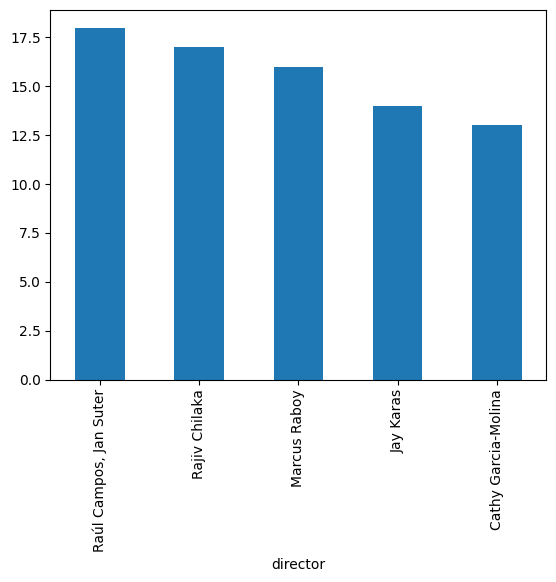

In [36]:
netflix_copy["director"].value_counts().head().plot(kind='bar')

In [37]:
# n how many movies/ tv shows, 'tom Cruise' was cast?
netflix_copy[netflix_copy['cast'].str.contains('James Yammouni')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre 1,Genre 2,Genre 3
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...,Comedies,NaN,NaN


In [38]:
## Top 3 countries based on count on shows
df['country'].value_counts(normalize=True)[:3]

country
United States     0.353310
India             0.121866
United Kingdom    0.052533
Name: proportion, dtype: float64

<Axes: xlabel='country'>

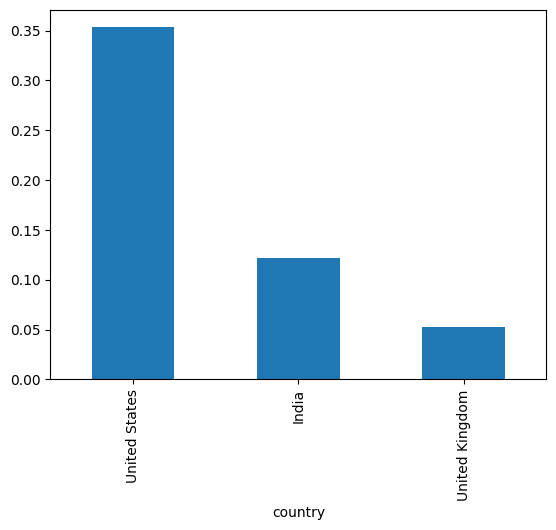

In [39]:
df['country'].value_counts(normalize=True)[:3].plot.bar()

In [44]:
temp_df = df[df['country'].isin(df['country'].value_counts()[:5].index)]
temp_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...


<Axes: xlabel='country', ylabel='count'>

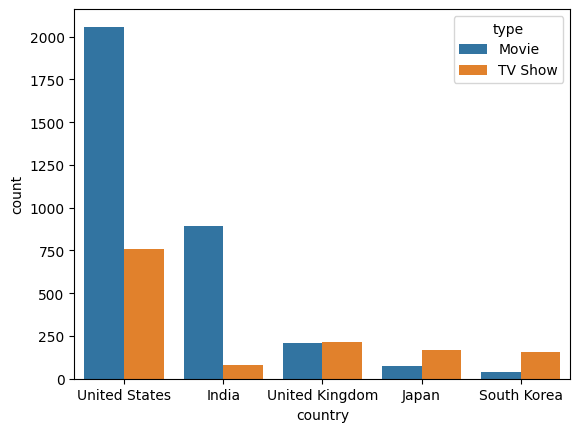

In [45]:
#In USA and India 'Movie' show are more famous than 'TV Shows',and in United Kingdom both type are equily popular,and In Japan 'TV shows' are more popular than 'Movie' shows.
sns.countplot(data=temp_df,x='country',hue='type')